# 📊 Telco Customer Churn - Exploratory Data Analysis

This notebook performs comprehensive exploratory data analysis on the processed Telco dataset.

**Objectives**:
- Deep dive into customer behavior patterns
- Analyze churn by different customer segments
- Identify key factors driving churn
- Generate business insights for retention strategies

In [1]:
# Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import warnings
warnings.filterwarnings('ignore')

# Set plotting style
plt.style.use('default')
sns.set_palette("husl")
plt.rcParams['figure.figsize'] = (12, 8)

print("📊 EDA Libraries Loaded!")

📊 EDA Libraries Loaded!


## 📥 Load Processed Data

In [4]:
# Load the processed dataset
try:
    df = pd.read_csv('../data/telco_processed_features.csv')
    df_original = pd.read_csv('../data/customer_churn.csv')
    print(f"✅ Processed dataset loaded: {df.shape}")
    print(f"✅ Original dataset loaded: {df_original.shape}")
except FileNotFoundError:
    print("❌ Processed dataset not found. Please run 02_feature_engineering.ipynb first")
    df = None
    df_original = None

if df is not None:
    print(f"\n📊 Dataset overview:")
    print(f"Churn rate: {df['Churn_Binary'].mean():.2%}")
    print(f"Total customers: {len(df):,}")
    print(f"Features: {df.shape[1] - 1}")  # -1 for target column

✅ Processed dataset loaded: (7043, 25)
✅ Original dataset loaded: (7043, 21)

📊 Dataset overview:
Churn rate: 26.54%
Total customers: 7,043
Features: 24


## 👥 Customer Demographics Analysis

👥 CUSTOMER DEMOGRAPHICS ANALYSIS


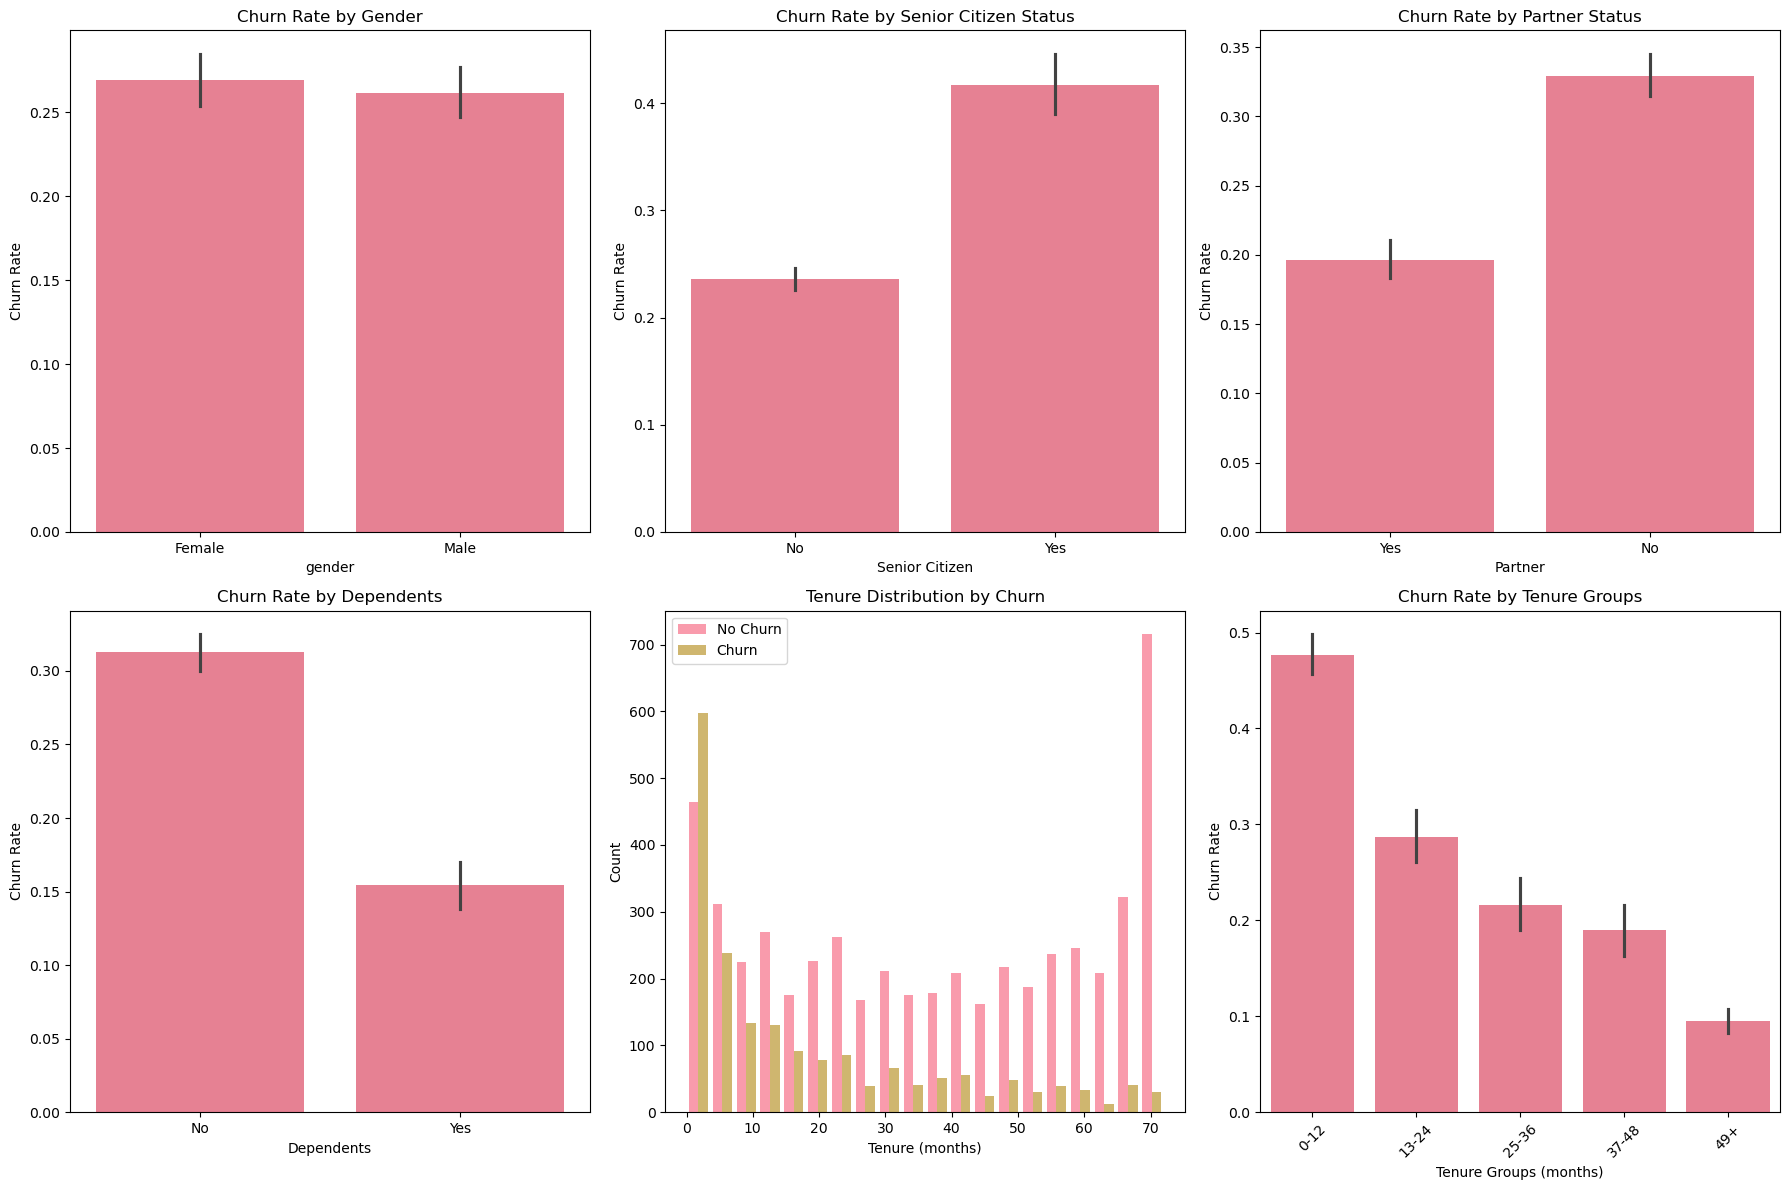


📊 Demographic Insights:
Senior citizens churn rate: 41.7%
Non-senior citizens churn rate: 23.6%
Customers with partner churn rate: 19.7%
Customers without partner churn rate: 33.0%


In [5]:
# Demographics analysis using original dataset for better interpretation
print("👥 CUSTOMER DEMOGRAPHICS ANALYSIS")

if df_original is not None:
    # Convert churn to binary for original dataset
    df_original['Churn_Binary'] = (df_original['Churn'] == 'Yes').astype(int)
    
    # Create demographics dashboard
    fig, axes = plt.subplots(2, 3, figsize=(18, 12))
    
    # 1. Gender vs Churn
    if 'gender' in df_original.columns:
        gender_churn = df_original.groupby('gender')['Churn_Binary'].agg(['count', 'mean']).reset_index()
        sns.barplot(data=df_original, x='gender', y='Churn_Binary', ax=axes[0,0])
        axes[0,0].set_title('Churn Rate by Gender')
        axes[0,0].set_ylabel('Churn Rate')
    
    # 2. Senior Citizen vs Churn
    if 'SeniorCitizen' in df_original.columns:
        df_original['SeniorCitizen_Label'] = df_original['SeniorCitizen'].map({0: 'No', 1: 'Yes'})
        sns.barplot(data=df_original, x='SeniorCitizen_Label', y='Churn_Binary', ax=axes[0,1])
        axes[0,1].set_title('Churn Rate by Senior Citizen Status')
        axes[0,1].set_xlabel('Senior Citizen')
        axes[0,1].set_ylabel('Churn Rate')
    
    # 3. Partner vs Churn
    if 'Partner' in df_original.columns:
        sns.barplot(data=df_original, x='Partner', y='Churn_Binary', ax=axes[0,2])
        axes[0,2].set_title('Churn Rate by Partner Status')
        axes[0,2].set_ylabel('Churn Rate')
    
    # 4. Dependents vs Churn
    if 'Dependents' in df_original.columns:
        sns.barplot(data=df_original, x='Dependents', y='Churn_Binary', ax=axes[1,0])
        axes[1,0].set_title('Churn Rate by Dependents')
        axes[1,0].set_ylabel('Churn Rate')
    
    # 5. Tenure distribution
    if 'tenure' in df_original.columns:
        axes[1,1].hist([df_original[df_original['Churn_Binary']==0]['tenure'],
                       df_original[df_original['Churn_Binary']==1]['tenure']],
                      bins=20, alpha=0.7, label=['No Churn', 'Churn'])
        axes[1,1].set_title('Tenure Distribution by Churn')
        axes[1,1].set_xlabel('Tenure (months)')
        axes[1,1].set_ylabel('Count')
        axes[1,1].legend()
    
    # 6. Age groups (if we can create them)
    if 'tenure' in df_original.columns:
        # Create tenure groups
        df_original['TenureGroup'] = pd.cut(df_original['tenure'], 
                                          bins=[0, 12, 24, 36, 48, 100], 
                                          labels=['0-12', '13-24', '25-36', '37-48', '49+'])
        sns.barplot(data=df_original, x='TenureGroup', y='Churn_Binary', ax=axes[1,2])
        axes[1,2].set_title('Churn Rate by Tenure Groups')
        axes[1,2].set_xlabel('Tenure Groups (months)')
        axes[1,2].set_ylabel('Churn Rate')
        axes[1,2].tick_params(axis='x', rotation=45)
    
    plt.tight_layout()
    plt.show()
    
    # Print demographic insights
    print("\n📊 Demographic Insights:")
    if 'SeniorCitizen' in df_original.columns:
        senior_churn = df_original.groupby('SeniorCitizen_Label')['Churn_Binary'].mean()
        print(f"Senior citizens churn rate: {senior_churn.get('Yes', 0):.1%}")
        print(f"Non-senior citizens churn rate: {senior_churn.get('No', 0):.1%}")
    
    if 'Partner' in df_original.columns:
        partner_churn = df_original.groupby('Partner')['Churn_Binary'].mean()
        print(f"Customers with partner churn rate: {partner_churn.get('Yes', 0):.1%}")
        print(f"Customers without partner churn rate: {partner_churn.get('No', 0):.1%}")

## 📞 Service Usage Analysis

📞 SERVICE USAGE ANALYSIS
Service columns found: ['PhoneService']


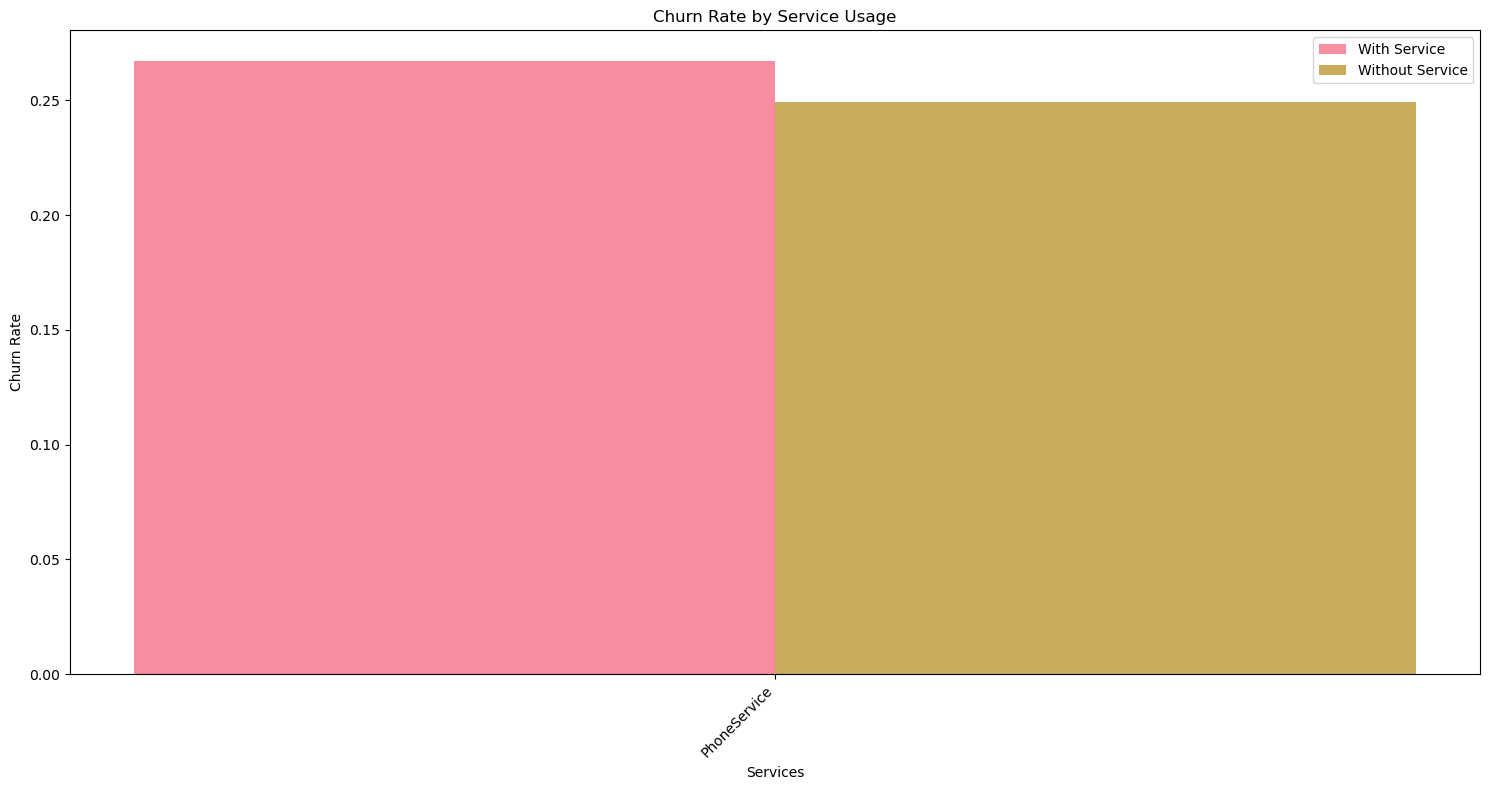

In [6]:
# Service usage analysis
print("📞 SERVICE USAGE ANALYSIS")

if df_original is not None:
    # Identify service columns
    service_columns = []
    for col in df_original.columns:
        if any(service in col.lower() for service in ['phone', 'internet', 'online', 'backup', 'protection', 'support', 'streaming']):
            if df_original[col].dtype == 'object' and set(df_original[col].unique()) <= {'Yes', 'No'}:
                service_columns.append(col)
    
    print(f"Service columns found: {service_columns}")
    
    if service_columns:
        # Calculate churn rate by service
        service_churn_rates = {}
        for service in service_columns:
            churn_rate = df_original[df_original[service] == 'Yes']['Churn_Binary'].mean()
            no_service_churn_rate = df_original[df_original[service] == 'No']['Churn_Binary'].mean()
            service_churn_rates[service] = {
                'With Service': churn_rate,
                'Without Service': no_service_churn_rate
            }
        
        # Create service analysis visualization
        service_df = pd.DataFrame(service_churn_rates).T
        
        plt.figure(figsize=(15, 8))
        x = np.arange(len(service_columns))
        width = 0.35
        
        plt.bar(x - width/2, service_df['With Service'], width, label='With Service', alpha=0.8)
        plt.bar(x + width/2, service_df['Without Service'], width, label='Without Service', alpha=0.8)
        
        plt.xlabel('Services')
        plt.ylabel('Churn Rate')
        plt.title('Churn Rate by Service Usage')
        plt.xticks(x, service_columns, rotation=45, ha='right')
        plt.legend()
        plt.tight_layout()
        plt.show()
        
        # Service penetration analysis
        if 'TotalServices' in df.columns:
            plt.figure(figsize=(12, 6))
            
            # Total services distribution
            plt.subplot(1, 2, 1)
            services_churn = df.groupby('TotalServices')['Churn_Binary'].agg(['count', 'mean'])
            plt.bar(services_churn.index, services_churn['count'], alpha=0.7)
            plt.xlabel('Number of Services')
            plt.ylabel('Number of Customers')
            plt.title('Customer Distribution by Number of Services')
            
            # Churn rate by number of services
            plt.subplot(1, 2, 2)
            plt.bar(services_churn.index, services_churn['mean'], alpha=0.7, color='coral')
            plt.xlabel('Number of Services')
            plt.ylabel('Churn Rate')
            plt.title('Churn Rate by Number of Services')
            
            plt.tight_layout()
            plt.show()
            
            print(f"\n📊 Service Usage Insights:")
            print(f"Average services per customer: {df['TotalServices'].mean():.1f}")
            print(f"Most common number of services: {df['TotalServices'].mode().iloc[0]}")
            
            # Show churn rate by service count
            for services, group in services_churn.iterrows():
                print(f"Customers with {services} services: {group['count']} customers, {group['mean']:.1%} churn rate")

## 💰 Financial Analysis

💰 FINANCIAL ANALYSIS


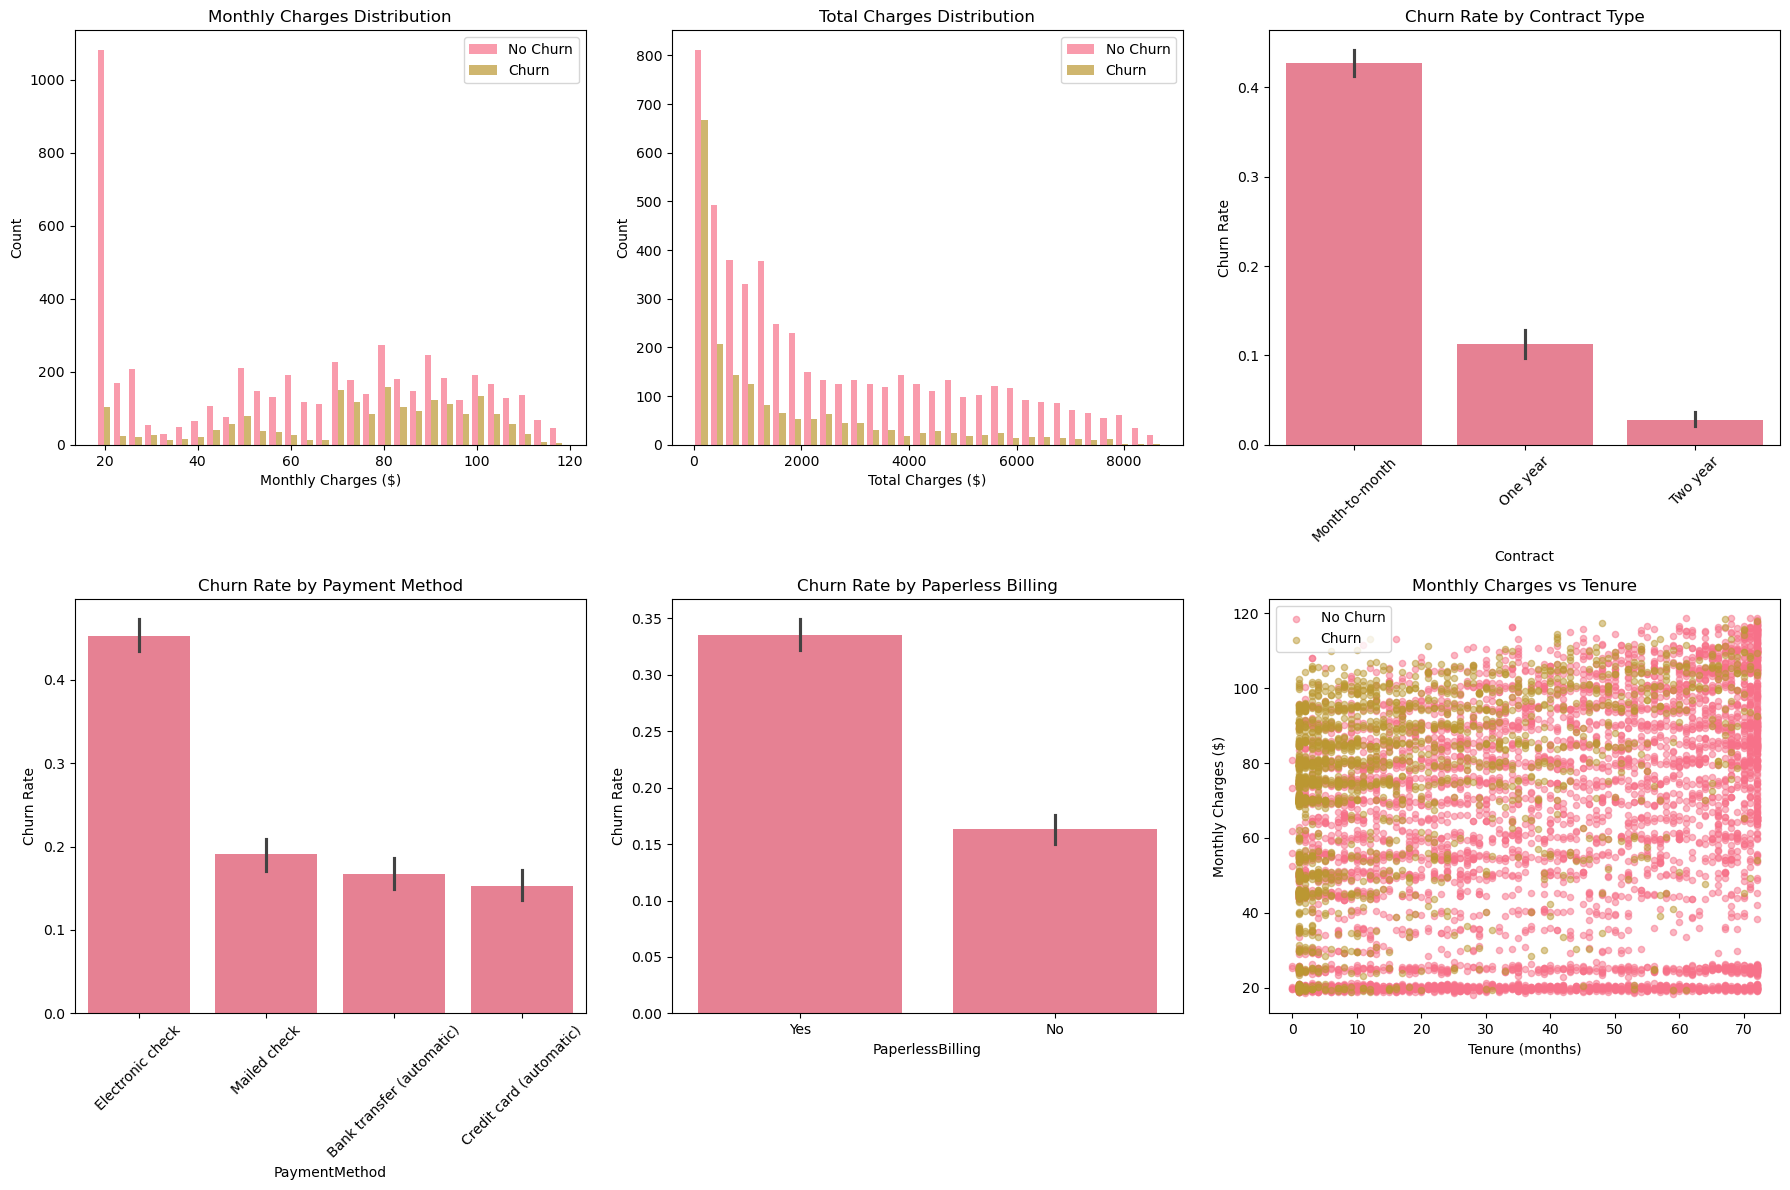


💰 Financial Insights:
Average monthly charges (No Churn): $61.27
Average monthly charges (Churn): $74.44
Difference: $13.18

Churn rates by contract:
  Month-to-month: 42.7%
  One year: 11.3%
  Two year: 2.8%


In [7]:
# Financial analysis
print("💰 FINANCIAL ANALYSIS")

if df_original is not None:
    # Handle TotalCharges conversion
    df_original['TotalCharges'] = df_original['TotalCharges'].replace(' ', np.nan)
    df_original['TotalCharges'] = pd.to_numeric(df_original['TotalCharges'], errors='coerce')
    df_original['TotalCharges'].fillna(0, inplace=True)
    
    # Financial metrics analysis
    fig, axes = plt.subplots(2, 3, figsize=(18, 12))
    
    # 1. Monthly Charges Distribution
    if 'MonthlyCharges' in df_original.columns:
        axes[0,0].hist([df_original[df_original['Churn_Binary']==0]['MonthlyCharges'],
                       df_original[df_original['Churn_Binary']==1]['MonthlyCharges']],
                      bins=30, alpha=0.7, label=['No Churn', 'Churn'])
        axes[0,0].set_title('Monthly Charges Distribution')
        axes[0,0].set_xlabel('Monthly Charges ($)')
        axes[0,0].set_ylabel('Count')
        axes[0,0].legend()
    
    # 2. Total Charges Distribution
    if 'TotalCharges' in df_original.columns:
        axes[0,1].hist([df_original[df_original['Churn_Binary']==0]['TotalCharges'],
                       df_original[df_original['Churn_Binary']==1]['TotalCharges']],
                      bins=30, alpha=0.7, label=['No Churn', 'Churn'])
        axes[0,1].set_title('Total Charges Distribution')
        axes[0,1].set_xlabel('Total Charges ($)')
        axes[0,1].set_ylabel('Count')
        axes[0,1].legend()
    
    # 3. Contract Type vs Churn
    if 'Contract' in df_original.columns:
        sns.barplot(data=df_original, x='Contract', y='Churn_Binary', ax=axes[0,2])
        axes[0,2].set_title('Churn Rate by Contract Type')
        axes[0,2].set_ylabel('Churn Rate')
        axes[0,2].tick_params(axis='x', rotation=45)
    
    # 4. Payment Method vs Churn
    if 'PaymentMethod' in df_original.columns:
        sns.barplot(data=df_original, x='PaymentMethod', y='Churn_Binary', ax=axes[1,0])
        axes[1,0].set_title('Churn Rate by Payment Method')
        axes[1,0].set_ylabel('Churn Rate')
        axes[1,0].tick_params(axis='x', rotation=45)
    
    # 5. Paperless Billing vs Churn
    if 'PaperlessBilling' in df_original.columns:
        sns.barplot(data=df_original, x='PaperlessBilling', y='Churn_Binary', ax=axes[1,1])
        axes[1,1].set_title('Churn Rate by Paperless Billing')
        axes[1,1].set_ylabel('Churn Rate')
    
    # 6. Monthly Charges vs Tenure (scatter)
    if 'MonthlyCharges' in df_original.columns and 'tenure' in df_original.columns:
        churn_0 = df_original[df_original['Churn_Binary'] == 0]
        churn_1 = df_original[df_original['Churn_Binary'] == 1]
        
        axes[1,2].scatter(churn_0['tenure'], churn_0['MonthlyCharges'], 
                         alpha=0.5, label='No Churn', s=20)
        axes[1,2].scatter(churn_1['tenure'], churn_1['MonthlyCharges'], 
                         alpha=0.5, label='Churn', s=20)
        axes[1,2].set_title('Monthly Charges vs Tenure')
        axes[1,2].set_xlabel('Tenure (months)')
        axes[1,2].set_ylabel('Monthly Charges ($)')
        axes[1,2].legend()
    
    plt.tight_layout()
    plt.show()
    
    # Financial insights
    print("\n💰 Financial Insights:")
    if 'MonthlyCharges' in df_original.columns:
        avg_charges_no_churn = df_original[df_original['Churn_Binary']==0]['MonthlyCharges'].mean()
        avg_charges_churn = df_original[df_original['Churn_Binary']==1]['MonthlyCharges'].mean()
        print(f"Average monthly charges (No Churn): ${avg_charges_no_churn:.2f}")
        print(f"Average monthly charges (Churn): ${avg_charges_churn:.2f}")
        print(f"Difference: ${avg_charges_churn - avg_charges_no_churn:.2f}")
    
    if 'Contract' in df_original.columns:
        contract_churn = df_original.groupby('Contract')['Churn_Binary'].mean()
        print(f"\nChurn rates by contract:")
        for contract, rate in contract_churn.items():
            print(f"  {contract}: {rate:.1%}")

## 🎯 Customer Segmentation Analysis

🎯 CUSTOMER SEGMENTATION ANALYSIS


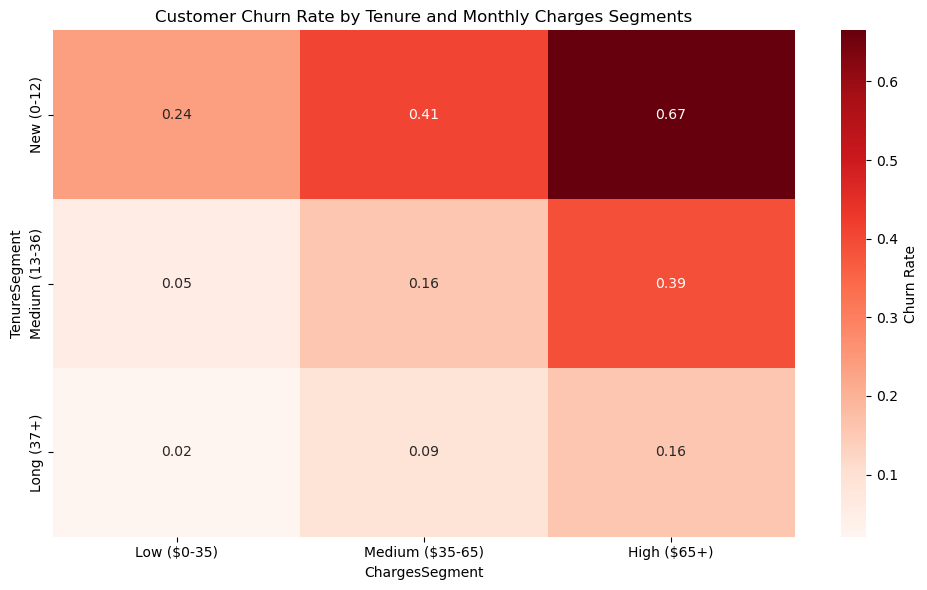

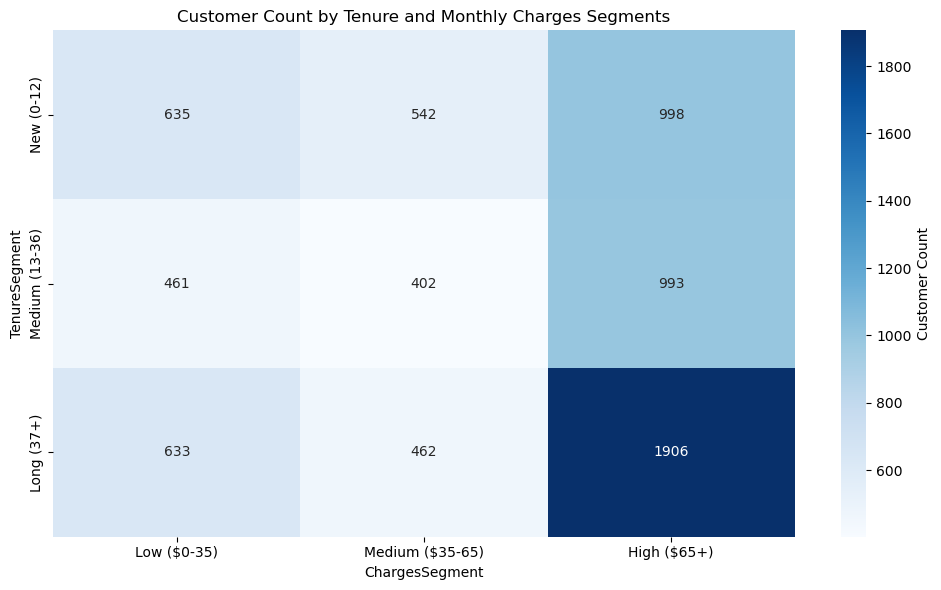


🎯 Customer Segment Insights:
New (0-12) + Low ($0-35): 635.0 customers, 23.9% churn rate
New (0-12) + Medium ($35-65): 542.0 customers, 40.8% churn rate
New (0-12) + High ($65+): 998.0 customers, 66.5% churn rate
Medium (13-36) + Low ($0-35): 461.0 customers, 5.2% churn rate
Medium (13-36) + Medium ($35-65): 402.0 customers, 15.7% churn rate
Medium (13-36) + High ($65+): 993.0 customers, 39.0% churn rate
Long (37+) + Low ($0-35): 633.0 customers, 2.1% churn rate
Long (37+) + Medium ($35-65): 462.0 customers, 9.1% churn rate
Long (37+) + High ($65+): 1906.0 customers, 15.9% churn rate

🚨 High-risk segments (>40% churn rate):
  New (0-12) + Medium ($35-65): 40.8% churn rate (542.0 customers)
  New (0-12) + High ($65+): 66.5% churn rate (998.0 customers)


In [8]:
# Customer segmentation analysis
print("🎯 CUSTOMER SEGMENTATION ANALYSIS")

if df_original is not None and 'MonthlyCharges' in df_original.columns and 'tenure' in df_original.columns:
    # Create customer segments based on tenure and monthly charges
    df_original['TenureSegment'] = pd.cut(df_original['tenure'], 
                                        bins=[0, 12, 36, 100], 
                                        labels=['New (0-12)', 'Medium (13-36)', 'Long (37+)'])
    
    df_original['ChargesSegment'] = pd.cut(df_original['MonthlyCharges'], 
                                         bins=[0, 35, 65, 200], 
                                         labels=['Low ($0-35)', 'Medium ($35-65)', 'High ($65+)'])
    
    # Create segmentation heatmap
    segment_analysis = df_original.groupby(['TenureSegment', 'ChargesSegment']).agg({
        'Churn_Binary': ['count', 'mean']
    }).round(3)
    
    segment_analysis.columns = ['Customer_Count', 'Churn_Rate']
    segment_pivot = segment_analysis.reset_index().pivot(index='TenureSegment', 
                                                        columns='ChargesSegment', 
                                                        values='Churn_Rate')
    
    plt.figure(figsize=(10, 6))
    sns.heatmap(segment_pivot, annot=True, cmap='Reds', fmt='.2f', 
                cbar_kws={'label': 'Churn Rate'})
    plt.title('Customer Churn Rate by Tenure and Monthly Charges Segments')
    plt.tight_layout()
    plt.show()
    
    # Customer count heatmap
    count_pivot = segment_analysis.reset_index().pivot(index='TenureSegment', 
                                                      columns='ChargesSegment', 
                                                      values='Customer_Count')
    
    plt.figure(figsize=(10, 6))
    sns.heatmap(count_pivot, annot=True, cmap='Blues', fmt='d', 
                cbar_kws={'label': 'Customer Count'})
    plt.title('Customer Count by Tenure and Monthly Charges Segments')
    plt.tight_layout()
    plt.show()
    
    # Print segment insights
    print("\n🎯 Customer Segment Insights:")
    for (tenure, charges), group in segment_analysis.iterrows():
        print(f"{tenure} + {charges}: {group['Customer_Count']} customers, {group['Churn_Rate']:.1%} churn rate")
    
    # Identify high-risk segments
    high_risk_segments = segment_analysis[segment_analysis['Churn_Rate'] > 0.4]
    print(f"\n🚨 High-risk segments (>40% churn rate):")
    for (tenure, charges), group in high_risk_segments.iterrows():
        print(f"  {tenure} + {charges}: {group['Churn_Rate']:.1%} churn rate ({group['Customer_Count']} customers)")

## 📊 Advanced Feature Analysis

📊 ADVANCED FEATURE ANALYSIS


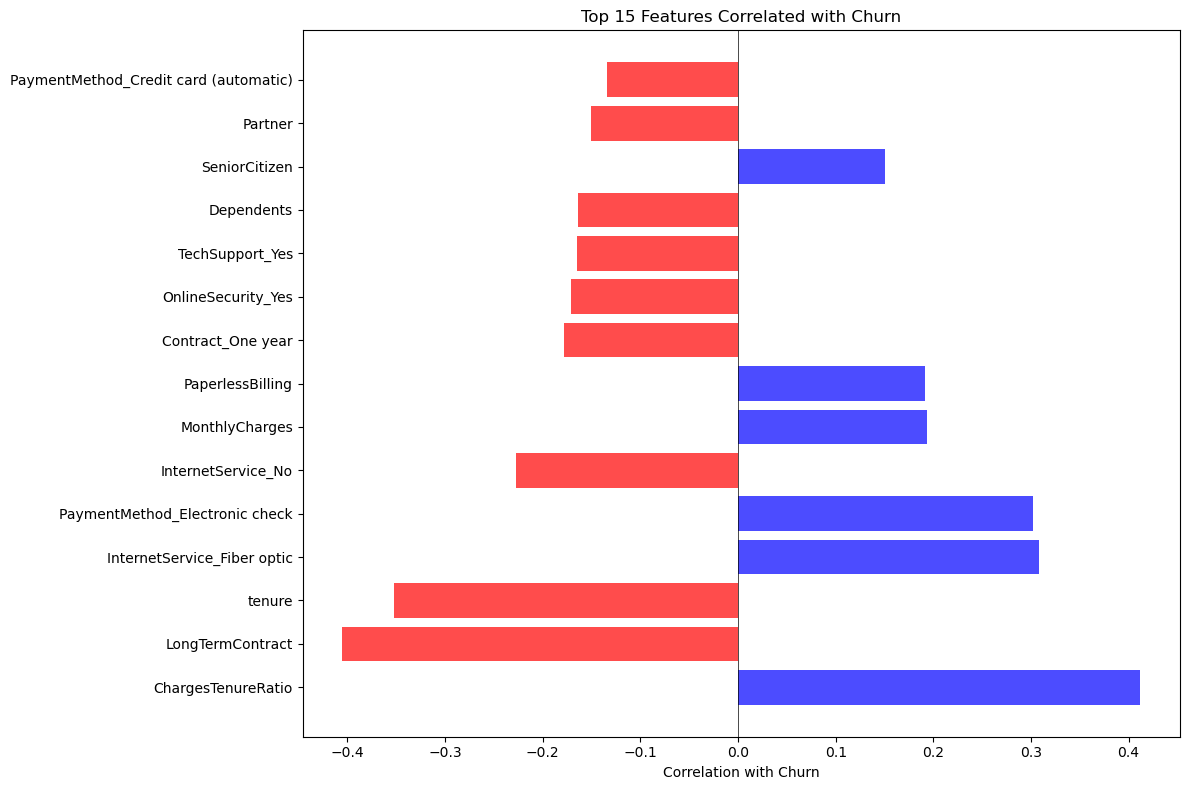


📊 Top Features Analysis:
Features positively correlated with churn (higher values = more likely to churn):
  ChargesTenureRatio: 0.412
  InternetService_Fiber optic: 0.308
  PaymentMethod_Electronic check: 0.302
  MonthlyCharges: 0.193
  PaperlessBilling: 0.192

Features negatively correlated with churn (higher values = less likely to churn):
  LongTermContract: -0.405
  tenure: -0.352
  InternetService_No: -0.228
  Contract_One year: -0.178
  OnlineSecurity_Yes: -0.171

💡 Business Insights from Top Features:
  💳 Payment method impacts churn - electronic payments may indicate different behavior
  ⏰ Customer tenure is a key factor - newer customers are more likely to churn
  🌐 Fiber optic internet customers may have different churn patterns


In [9]:
# Advanced feature analysis using processed dataset
print("📊 ADVANCED FEATURE ANALYSIS")

if df is not None:
    # Top features by correlation with churn
    feature_cols = [col for col in df.columns if col != 'Churn_Binary']
    correlations = df[feature_cols].corrwith(df['Churn_Binary']).sort_values(key=abs, ascending=False)
    
    # Plot top 15 features
    plt.figure(figsize=(12, 8))
    top_15_features = correlations.head(15)
    colors = ['red' if x < 0 else 'blue' for x in top_15_features.values]
    
    plt.barh(range(len(top_15_features)), top_15_features.values, color=colors, alpha=0.7)
    plt.yticks(range(len(top_15_features)), top_15_features.index)
    plt.xlabel('Correlation with Churn')
    plt.title('Top 15 Features Correlated with Churn')
    plt.axvline(x=0, color='black', linestyle='-', linewidth=0.5)
    plt.tight_layout()
    plt.show()
    
    print("\n📊 Top Features Analysis:")
    print("Features positively correlated with churn (higher values = more likely to churn):")
    positive_corr = correlations[correlations > 0].head(5)
    for feature, corr in positive_corr.items():
        print(f"  {feature}: {corr:.3f}")
    
    print("\nFeatures negatively correlated with churn (higher values = less likely to churn):")
    negative_corr = correlations[correlations < 0].head(5)
    for feature, corr in negative_corr.items():
        print(f"  {feature}: {corr:.3f}")
    
    # Feature importance for business insights
    if len(top_15_features) > 0:
        print("\n💡 Business Insights from Top Features:")
        
        # Analyze specific patterns
        insights = []
        
        for feature in top_15_features.index[:5]:
            if 'contract' in feature.lower() and 'month' in feature.lower():
                insights.append("📅 Month-to-month contracts are strongly associated with churn")
            elif 'tenure' in feature.lower():
                insights.append("⏰ Customer tenure is a key factor - newer customers are more likely to churn")
            elif 'internet' in feature.lower() and 'fiber' in feature.lower():
                insights.append("🌐 Fiber optic internet customers may have different churn patterns")
            elif 'payment' in feature.lower() and 'electronic' in feature.lower():
                insights.append("💳 Payment method impacts churn - electronic payments may indicate different behavior")
            elif 'paperless' in feature.lower():
                insights.append("📄 Paperless billing preference correlates with churn behavior")
        
        for insight in set(insights):  # Remove duplicates
            print(f"  {insight}")

## 💸 Revenue Impact Analysis

💸 REVENUE IMPACT ANALYSIS
📊 Revenue Impact Summary:
Total customers: 7,043
Churned customers: 1,869 (26.5%)
Retained customers: 5,174 (73.5%)

Average monthly revenue per churned customer: $74.44
Average monthly revenue per retained customer: $61.27

Monthly revenue lost due to churn: $139,130.85
Annual revenue lost due to churn: $1,669,570.20

💰 Revenue Impact by Customer Segment:
New (0-12) + Low ($0-35): $40,032 annual revenue lost
New (0-12) + Medium ($35-65): $132,548 annual revenue lost
New (0-12) + High ($65+): $647,886 annual revenue lost
Medium (13-36) + Low ($0-35): $6,288 annual revenue lost
Medium (13-36) + Medium ($35-65): $39,767 annual revenue lost
Medium (13-36) + High ($65+): $403,029 annual revenue lost
Long (37+) + Low ($0-35): $3,471 annual revenue lost
Long (37+) + Medium ($35-65): $26,891 annual revenue lost
Long (37+) + High ($65+): $338,349 annual revenue lost


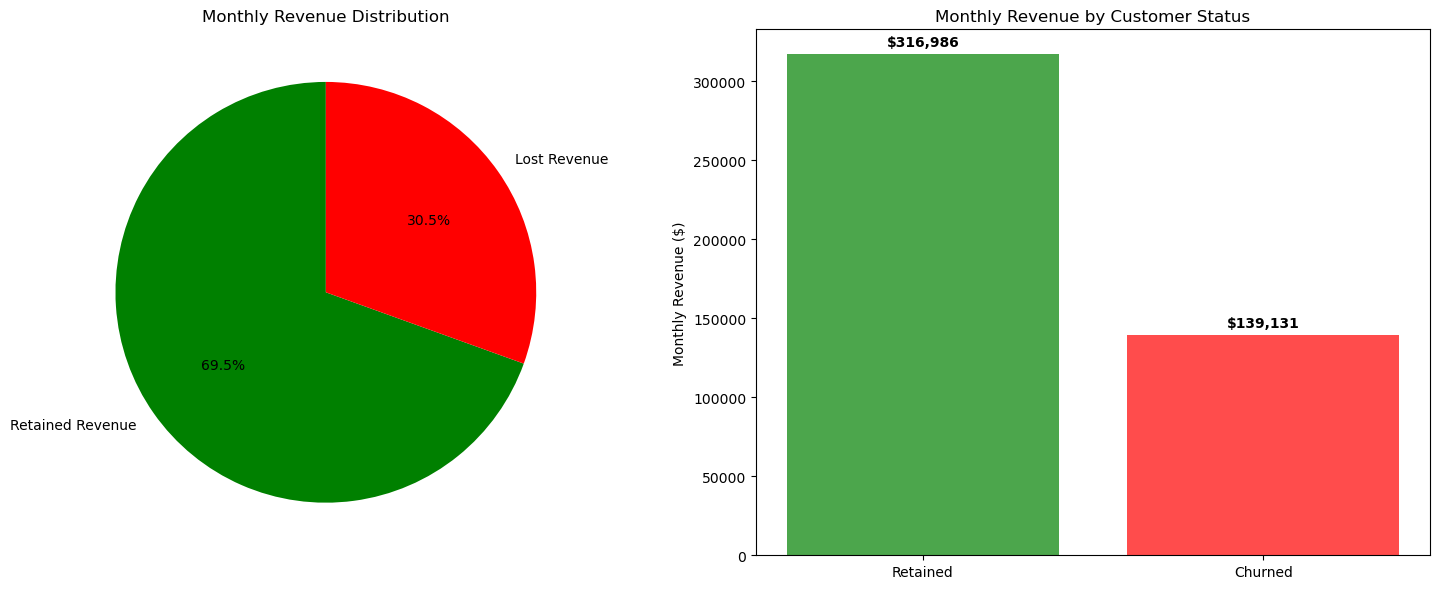


📈 Potential Impact of Churn Reduction:
  10% churn reduction: $166,957 additional annual revenue
  25% churn reduction: $417,393 additional annual revenue
  50% churn reduction: $834,785 additional annual revenue


In [10]:
# Revenue impact analysis
print("💸 REVENUE IMPACT ANALYSIS")

if df_original is not None and 'MonthlyCharges' in df_original.columns:
    # Calculate revenue metrics
    total_customers = len(df_original)
    churned_customers = df_original['Churn_Binary'].sum()
    retained_customers = total_customers - churned_customers
    
    avg_monthly_revenue_churned = df_original[df_original['Churn_Binary']==1]['MonthlyCharges'].mean()
    avg_monthly_revenue_retained = df_original[df_original['Churn_Binary']==0]['MonthlyCharges'].mean()
    
    total_monthly_revenue_lost = churned_customers * avg_monthly_revenue_churned
    total_monthly_revenue_retained = retained_customers * avg_monthly_revenue_retained
    
    # Annual projections
    annual_revenue_lost = total_monthly_revenue_lost * 12
    annual_revenue_retained = total_monthly_revenue_retained * 12
    
    print(f"📊 Revenue Impact Summary:")
    print(f"Total customers: {total_customers:,}")
    print(f"Churned customers: {churned_customers:,} ({churned_customers/total_customers:.1%})")
    print(f"Retained customers: {retained_customers:,} ({retained_customers/total_customers:.1%})")
    print(f"\nAverage monthly revenue per churned customer: ${avg_monthly_revenue_churned:.2f}")
    print(f"Average monthly revenue per retained customer: ${avg_monthly_revenue_retained:.2f}")
    print(f"\nMonthly revenue lost due to churn: ${total_monthly_revenue_lost:,.2f}")
    print(f"Annual revenue lost due to churn: ${annual_revenue_lost:,.2f}")
    
    # Revenue impact by segment
    if 'TenureSegment' in df_original.columns and 'ChargesSegment' in df_original.columns:
        revenue_impact = df_original.groupby(['TenureSegment', 'ChargesSegment']).agg({
            'Churn_Binary': 'sum',
            'MonthlyCharges': 'mean'
        })
        revenue_impact['Monthly_Revenue_Lost'] = revenue_impact['Churn_Binary'] * revenue_impact['MonthlyCharges']
        revenue_impact['Annual_Revenue_Lost'] = revenue_impact['Monthly_Revenue_Lost'] * 12
        
        print(f"\n💰 Revenue Impact by Customer Segment:")
        for (tenure, charges), row in revenue_impact.iterrows():
            if row['Monthly_Revenue_Lost'] > 0:
                print(f"{tenure} + {charges}: ${row['Annual_Revenue_Lost']:,.0f} annual revenue lost")
    
    # Create revenue visualization
    fig, axes = plt.subplots(1, 2, figsize=(15, 6))
    
    # Revenue distribution
    revenue_data = ['Retained Revenue', 'Lost Revenue']
    revenue_values = [total_monthly_revenue_retained, total_monthly_revenue_lost]
    colors = ['green', 'red']
    
    axes[0].pie(revenue_values, labels=revenue_data, colors=colors, autopct='%1.1f%%', startangle=90)
    axes[0].set_title('Monthly Revenue Distribution')
    
    # Revenue by churn status
    churn_labels = ['Retained', 'Churned']
    monthly_revenues = [total_monthly_revenue_retained, total_monthly_revenue_lost]
    
    axes[1].bar(churn_labels, monthly_revenues, color=colors, alpha=0.7)
    axes[1].set_title('Monthly Revenue by Customer Status')
    axes[1].set_ylabel('Monthly Revenue ($)')
    
    # Add value labels on bars
    for i, v in enumerate(monthly_revenues):
        axes[1].text(i, v + max(monthly_revenues) * 0.01, f'${v:,.0f}', 
                    ha='center', va='bottom', fontweight='bold')
    
    plt.tight_layout()
    plt.show()
    
    # Calculate potential impact of churn reduction
    print(f"\n📈 Potential Impact of Churn Reduction:")
    for reduction in [10, 25, 50]:
        reduced_churn = churned_customers * (1 - reduction/100)
        revenue_saved = (churned_customers - reduced_churn) * avg_monthly_revenue_churned * 12
        print(f"  {reduction}% churn reduction: ${revenue_saved:,.0f} additional annual revenue")

## 🎯 Business Recommendations

In [11]:
# Generate business recommendations based on analysis
print("🎯 BUSINESS RECOMMENDATIONS")

print("\n📋 KEY FINDINGS SUMMARY:")
if df_original is not None:
    print(f"1. Overall churn rate: {df_original['Churn_Binary'].mean():.1%}")
    
    if 'Contract' in df_original.columns:
        mtm_churn = df_original[df_original['Contract'] == 'Month-to-month']['Churn_Binary'].mean()
        print(f"2. Month-to-month contract churn rate: {mtm_churn:.1%}")
    
    if 'tenure' in df_original.columns:
        new_customer_churn = df_original[df_original['tenure'] <= 12]['Churn_Binary'].mean()
        print(f"3. New customer (≤12 months) churn rate: {new_customer_churn:.1%}")
    
    if 'SeniorCitizen' in df_original.columns:
        senior_churn = df_original[df_original['SeniorCitizen'] == 1]['Churn_Binary'].mean()
        print(f"4. Senior citizen churn rate: {senior_churn:.1%}")

print("\n💡 STRATEGIC RECOMMENDATIONS:")

recommendations = [
    {
        "priority": "HIGH",
        "action": "Contract Retention Program",
        "description": "Implement incentives to convert month-to-month customers to longer contracts",
        "expected_impact": "Reduce month-to-month churn by 20-30%"
    },
    {
        "priority": "HIGH",
        "action": "New Customer Onboarding",
        "description": "Enhance first-year customer experience with dedicated support and engagement",
        "expected_impact": "Reduce new customer churn by 15-25%"
    },
    {
        "priority": "MEDIUM",
        "action": "Senior Customer Program",
        "description": "Develop targeted services and support for senior citizens",
        "expected_impact": "Improve senior customer retention by 10-20%"
    },
    {
        "priority": "MEDIUM",
        "action": "Payment Method Optimization",
        "description": "Promote automatic payment methods and resolve billing issues proactively",
        "expected_impact": "Reduce payment-related churn by 10-15%"
    },
    {
        "priority": "LOW",
        "action": "Service Bundle Optimization",
        "description": "Create attractive service bundles to increase customer stickiness",
        "expected_impact": "Increase average revenue per customer by 5-10%"
    }
]

for i, rec in enumerate(recommendations, 1):
    print(f"\n{i}. [{rec['priority']} PRIORITY] {rec['action']}")
    print(f"   📋 Action: {rec['description']}")
    print(f"   📈 Expected Impact: {rec['expected_impact']}")

print("\n🎯 IMMEDIATE ACTION ITEMS:")
action_items = [
    "🚨 Identify and contact customers with highest churn probability",
    "📞 Implement proactive retention campaigns for month-to-month customers",
    "🎓 Develop comprehensive onboarding program for new customers",
    "💰 Create retention offers for high-value customers showing churn signals",
    "📊 Implement real-time churn prediction monitoring system"
]

for item in action_items:
    print(f"  {item}")

print("\n📊 SUCCESS METRICS TO TRACK:")
metrics = [
    "📉 Overall churn rate reduction",
    "💰 Customer lifetime value improvement", 
    "📞 Customer satisfaction scores",
    "⏰ Average customer tenure increase",
    "🎯 Retention campaign effectiveness"
]

for metric in metrics:
    print(f"  {metric}")

print("\n✅ EDA COMPLETE - Ready for Machine Learning Model Development!")

🎯 BUSINESS RECOMMENDATIONS

📋 KEY FINDINGS SUMMARY:
1. Overall churn rate: 26.5%
2. Month-to-month contract churn rate: 42.7%
3. New customer (≤12 months) churn rate: 47.4%
4. Senior citizen churn rate: 41.7%

💡 STRATEGIC RECOMMENDATIONS:

1. [HIGH PRIORITY] Contract Retention Program
   📋 Action: Implement incentives to convert month-to-month customers to longer contracts
   📈 Expected Impact: Reduce month-to-month churn by 20-30%

2. [HIGH PRIORITY] New Customer Onboarding
   📋 Action: Enhance first-year customer experience with dedicated support and engagement
   📈 Expected Impact: Reduce new customer churn by 15-25%

3. [MEDIUM PRIORITY] Senior Customer Program
   📋 Action: Develop targeted services and support for senior citizens
   📈 Expected Impact: Improve senior customer retention by 10-20%

4. [MEDIUM PRIORITY] Payment Method Optimization
   📋 Action: Promote automatic payment methods and resolve billing issues proactively
   📈 Expected Impact: Reduce payment-related churn by

## 💾 Save Analysis Results

In [12]:
# Save analysis results and insights
print("💾 SAVING ANALYSIS RESULTS")

if df is not None and df_original is not None:
    # Create analysis summary
    analysis_summary = {
        'total_customers': len(df_original),
        'churned_customers': df_original['Churn_Binary'].sum(),
        'churn_rate': df_original['Churn_Binary'].mean(),
        'avg_monthly_charges_churned': df_original[df_original['Churn_Binary']==1]['MonthlyCharges'].mean(),
        'avg_monthly_charges_retained': df_original[df_original['Churn_Binary']==0]['MonthlyCharges'].mean(),
        'avg_tenure_churned': df_original[df_original['Churn_Binary']==1]['tenure'].mean(),
        'avg_tenure_retained': df_original[df_original['Churn_Binary']==0]['tenure'].mean()
    }
    
    # Save summary
    pd.DataFrame([analysis_summary]).to_csv('../data/eda_summary.csv', index=False)
    print("✅ EDA summary saved as '../data/eda_summary.csv'")
    
    # Save top features correlation
    if 'correlations' in locals():
        correlations.to_csv('../data/feature_correlations.csv')
        print("✅ Feature correlations saved as '../data/feature_correlations.csv'")
    
    # Save customer segments analysis
    if 'segment_analysis' in locals():
        segment_analysis.to_csv('../data/customer_segments.csv')
        print("✅ Customer segments analysis saved as '../data/customer_segments.csv'")
    
    print("\n📋 ANALYSIS COMPLETE:")
    print(f"✅ Comprehensive EDA performed on {len(df_original):,} customers")
    print(f"✅ {df.shape[1]-1} features analyzed")
    print(f"✅ Business insights and recommendations generated")
    print(f"✅ Data ready for machine learning modeling")
    
    print("\n🚀 Next step: Run notebook 04_machine_learning_models.ipynb")

💾 SAVING ANALYSIS RESULTS
✅ EDA summary saved as '../data/eda_summary.csv'
✅ Feature correlations saved as '../data/feature_correlations.csv'
✅ Customer segments analysis saved as '../data/customer_segments.csv'

📋 ANALYSIS COMPLETE:
✅ Comprehensive EDA performed on 7,043 customers
✅ 24 features analyzed
✅ Business insights and recommendations generated
✅ Data ready for machine learning modeling

🚀 Next step: Run notebook 04_machine_learning_models.ipynb
